In [120]:
# Linear Regaression - Salary prediction for the expericened candidate

In [121]:
# Numpy is a library used for performing operations related to data manipulation, such as reading, writing, 
#and other database-related tasks.
import numpy as np

In [122]:
# Pandas is a libarary for manipulating multi dinmensional array of objects.  
# The same can be used to read data from a file and to manipulate/analyse the data.
import pandas as pd

In [123]:
# "matplotlib.pyplot is a Python library used for plotting data to create visualizations, 
# including both static and interactive plots."
import matplotlib.pyplot as mp

In [124]:
# It is a function used to read data from a CSV file, with the data values being assigned to the variable 'data'.
data = pd.read_csv('Salary_Data.csv')
data
data.tail

<bound method NDFrame.tail of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [125]:
# Extract the 1D values representing years of experience from the multi-dimensional array 'data' to assign them to the x-axis.
xdata = data[['YearsExperience']]

In [126]:
# Extract the 1D values representing salary from the multi-dimensional array 'data' to assign them to the y-axis.
ydata = data[['Salary']]

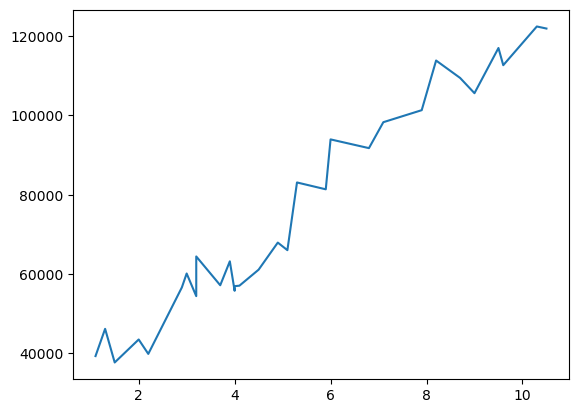

In [127]:
# To plot the graph in order to check how the data getting is distributed and so the model algorithym can be decided.
#defaul style of plotting considering xdata as x-axis and ydata as y-axis
mp.plot(xdata,ydata)

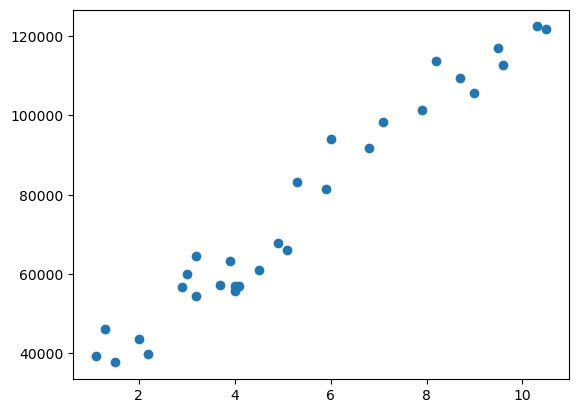

In [128]:
# To plot the data in scatter style
scatter =mp.scatter(xdata,ydata)

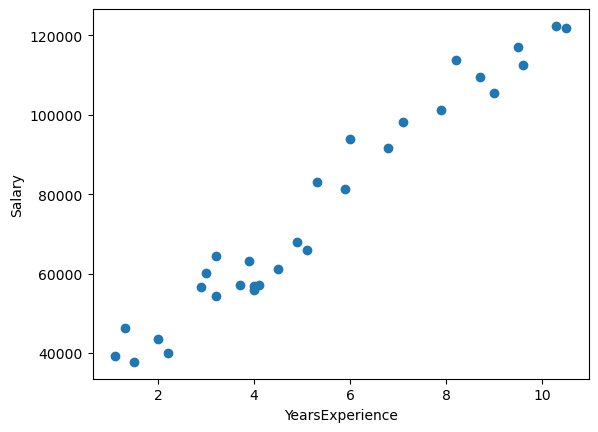

In [129]:
# To set labels for the x-axis and y-axis of the matplotlib plot and display them on the graph.
mp.xlabel("YearsExperience")
mp.ylabel('Salary')
# To draw the scatter type plot again with labels
mp.scatter(xdata,ydata)

In [130]:
#sklearn is a library used to build and implement machine learning models.
#To import train_test_split class from sklearn library
from sklearn.model_selection import train_test_split
# The collected dataset is split into two sets: a training set and a test set, typically with an 80:20 ratio
# An AI model is created using the training set, which allows the model to learn.
# The test set is then used to evaluate the performance of the trained model.
# It's important that the model never uses the test data during the training phase, and vice versa.
# In this case, the split is 66.66% for the training set and 33.33% for the test set
xtrain,xtest,ytrain,ytest = train_test_split(xdata,ydata,test_size=1/3,random_state=0)

In [131]:
ytest

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0
22,101302.0


In [132]:
xtest

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0
17,5.3
22,7.9


In [133]:
from sklearn.linear_model import LinearRegression 
# The Linear Regression class will be assigned to the 'regressor' variable, allowing access to its members and methods.
regressor = LinearRegression()
#F It is a method in the Linear Regression class. Once executed, it prepares the AI model (the 'brain') to solve the given problem.
regressor.fit(xtrain,ytrain)
# Bias is an initial value assigned to the model and plays a crucial role in AI predictions. It can be accessed through the 'intercept_' attribute of the LinearRegression class.
bias = regressor.intercept_
# Slope indicates the rate at which the line is rising or falling. It can be accessed through the 'coef_' attribute of the LinearRegression class.
slope=  regressor.coef_

In [134]:
bias

array([26816.19224403])

In [135]:
slope
print("intercept model={}".format(bias))

intercept model=[26816.19224403]


In [136]:
# The `predict` method is used to predict the Y value for a given X test data or input. This method is commonly used in production environments for making frequent predictions.
Y_predict = regressor.predict(xtest)

In [137]:
Y_predict

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [138]:
# The r2_score` helps evaluate the performance of the model. The closer the r2_score value is to 1, the better the model performs, and the lower the value, the worse the performance.
# The r2_score` function is available in `sklearn.metrics` and is used to assess the model using metrics like R-squared and adjusted R-squared, among others.
from sklearn.metrics import r2_score as r2_score
r2_score = r2_score(ytest,Y_predict)


In [139]:
r2_score
# Pickle is a library used to save a model generated through Python code into a file with a `.sav` extension. 
# The file is stored in binary format. The saved model can be loaded using the `load` function from the Pickle library. 
# It is primarily used for deployment purposes, allowing the model to be ported and reused in different environments.
import pickle 
filename = "finalmodel.sav"
# The dump function in the Pickle library is used to save the created model to a file for porting. The model is stored as a binary file.
pickle.dump(regressor,open(filename,'wb'))

In [140]:
# The Pickle function `load` is used to load a model from a file located at a specified path (in this case, the working environment folder).
loadedmodel= pickle.load(open(filename,'rb'))

In [141]:
# The `predict` function is called to make AI predictions using the test data.
output = loadedmodel.predict([[130]])

C:\Users\Boss\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [142]:
output

array([[1241788.70984994]])